In [1]:
!pip -q install yellowbrick==1.3

!pip -q install kneed
!pip -q install factor_analyzer
!pip -q install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from yellowbrick.features import PCA as YBPCA
from kneed import KneeLocator
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
#import plotly.express as px

In [30]:
auto = pd.read_csv('../feature_engineering/seoulDate_automatedEngin.csv')
auto

,Unnamed: 0,Unnamed: 0_x,Unnamed: 0.1,datetime,date,hour,season,holiday,open,rent_count,...,Holiday.STD(seoul_bike.visibility),Holiday.STD(seoul_bike.wind_speed),Holiday.SUM(seoul_bike.dewpoint_temp),Holiday.SUM(seoul_bike.humidity),Holiday.SUM(seoul_bike.rainfall),Holiday.SUM(seoul_bike.snowfall),Holiday.SUM(seoul_bike.solar_radiation),Holiday.SUM(seoul_bike.temperature),Holiday.SUM(seoul_bike.visibility),Holiday.SUM(seoul_bike.wind_speed)
0,0,0,1,2017-12-01 00:00:00,2017-12-01,0,Winter,No Holiday,Yes,254,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
1,1,1,2,2017-12-01 01:00:00,2017-12-01,1,Winter,No Holiday,Yes,204,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
2,2,2,3,2017-12-01 02:00:00,2017-12-01,2,Winter,No Holiday,Yes,173,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
3,3,3,4,2017-12-01 03:00:00,2017-12-01,3,Winter,No Holiday,Yes,107,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
4,4,4,5,2017-12-01 04:00:00,2017-12-01,4,Winter,No Holiday,Yes,78,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,8755,8756,2018-11-30 19:00:00,2018-11-30,19,Autumn,No Holiday,Yes,1003,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
8756,8756,8756,8757,2018-11-30 20:00:00,2018-11-30,20,Autumn,No Holiday,Yes,764,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
8757,8757,8757,8758,2018-11-30 21:00:00,2018-11-30,21,Autumn,No Holiday,Yes,694,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
8758,8758,8758,8759,2018-11-30 22:00:00,2018-11-30,22,Autumn,No Holiday,Yes,712,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8


In [4]:
auto.describe()

,Unnamed: 0,Unnamed: 0_x,Unnamed: 0.1,hour,rent_count,temperature,humidity,wind_speed,visibility,dewpoint_temp,...,Holiday.STD(seoul_bike.visibility),Holiday.STD(seoul_bike.wind_speed),Holiday.SUM(seoul_bike.dewpoint_temp),Holiday.SUM(seoul_bike.humidity),Holiday.SUM(seoul_bike.rainfall),Holiday.SUM(seoul_bike.snowfall),Holiday.SUM(seoul_bike.solar_radiation),Holiday.SUM(seoul_bike.temperature),Holiday.SUM(seoul_bike.visibility),Holiday.SUM(seoul_bike.wind_speed)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8.760000e+03,8760.000000
mean,4379.500000,4379.500000,4380.500000,11.500000,704.602055,12.882922,58.226256,1.724909,14368.257991,4.073813,...,6079.940742,1.035736,33830.987397,463985.660274,1207.890959,6053.402740,4525.487836,103414.619452,1.137336e+08,13652.596712
std,2528.938512,2528.938512,2528.938512,6.922582,644.997468,11.944825,20.362413,1.036300,6082.987120,13.060369,...,65.629832,0.027388,7681.490992,100394.966500,267.445341,1328.673479,976.676780,22575.712816,2.440780e+07,2929.621083
min,0.000000,0.000000,1.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,270.000000,-30.600000,...,6064.993949,1.029499,106.200000,23212.000000,33.700000,220.000000,237.490000,4298.300000,6.573660e+06,790.400000
25%,2189.750000,2189.750000,2190.750000,5.750000,191.000000,3.500000,42.000000,0.900000,9400.000000,-4.700000,...,6064.993949,1.029499,35580.400000,486850.000000,1268.800000,6356.000000,4747.920000,108556.100000,1.192923e+08,14319.800000
50%,4379.500000,4379.500000,4380.500000,11.500000,504.500000,13.700000,57.000000,1.500000,16980.000000,5.100000,...,6064.993949,1.029499,35580.400000,486850.000000,1268.800000,6356.000000,4747.920000,108556.100000,1.192923e+08,14319.800000
75%,6569.250000,6569.250000,6570.250000,17.250000,1065.250000,22.500000,74.000000,2.300000,20000.000000,14.800000,...,6064.993949,1.029499,35580.400000,486850.000000,1268.800000,6356.000000,4747.920000,108556.100000,1.192923e+08,14319.800000
max,8759.000000,8759.000000,8760.000000,23.000000,3556.000000,39.400000,98.000000,7.400000,20000.000000,27.200000,...,6368.081696,1.155980,35580.400000,486850.000000,1268.800000,6356.000000,4747.920000,108556.100000,1.192923e+08,14319.800000


In [ ]:
auto_colnames = list(auto.columns)
auto_colnames

In [ ]:
auto_num_colnames = list(auto.describe().columns)
auto_num_colnames

In [19]:

diff_names = []
for i in auto_colnames:
	if i not in auto_num_colnames:
		diff_names.append(i)
diff_names

['datetime',
 'date',
 'season',
 'holiday',
 'open',
 'dayName_of_week',
 'month_name',
 'hour_of_day.MODE(seoul_bike.holiday)',
 'hour_of_day.MODE(seoul_bike.open)',
 'hour_of_day.MODE(seoul_bike.season)',
 'Season.MODE(seoul_bike.holiday)',
 'Season.MODE(seoul_bike.open)',
 'Holiday.MODE(seoul_bike.open)',
 'Holiday.MODE(seoul_bike.season)']

In [20]:
season = auto['season']
season

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
8755    Autumn
8756    Autumn
8757    Autumn
8758    Autumn
8759    Autumn
Name: season, Length: 8760, dtype: object

In [32]:
auto2 = auto.copy()
auto2.drop(columns = diff_names, inplace = True)
auto2
#now it only has numeric columns

,Unnamed: 0,Unnamed: 0_x,Unnamed: 0.1,hour,rent_count,temperature,humidity,wind_speed,visibility,dewpoint_temp,...,Holiday.STD(seoul_bike.visibility),Holiday.STD(seoul_bike.wind_speed),Holiday.SUM(seoul_bike.dewpoint_temp),Holiday.SUM(seoul_bike.humidity),Holiday.SUM(seoul_bike.rainfall),Holiday.SUM(seoul_bike.snowfall),Holiday.SUM(seoul_bike.solar_radiation),Holiday.SUM(seoul_bike.temperature),Holiday.SUM(seoul_bike.visibility),Holiday.SUM(seoul_bike.wind_speed)
0,0,0,1,0,254,-5.2,37,2.2,20000,-17.6,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
1,1,1,2,1,204,-5.5,38,0.8,20000,-17.6,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
2,2,2,3,2,173,-6.0,39,1.0,20000,-17.7,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
3,3,3,4,3,107,-6.2,40,0.9,20000,-17.6,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
4,4,4,5,4,78,-6.0,36,2.3,20000,-18.6,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,8755,8756,19,1003,4.2,34,2.6,18940,-10.3,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
8756,8756,8756,8757,20,764,3.4,37,2.3,20000,-9.9,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
8757,8757,8757,8758,21,694,2.6,39,0.3,19680,-9.9,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
8758,8758,8758,8759,22,712,2.1,41,1.0,18590,-9.8,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8


In [34]:
auto2.describe()

,Unnamed: 0,Unnamed: 0_x,Unnamed: 0.1,hour,rent_count,temperature,humidity,wind_speed,visibility,dewpoint_temp,...,Holiday.STD(seoul_bike.visibility),Holiday.STD(seoul_bike.wind_speed),Holiday.SUM(seoul_bike.dewpoint_temp),Holiday.SUM(seoul_bike.humidity),Holiday.SUM(seoul_bike.rainfall),Holiday.SUM(seoul_bike.snowfall),Holiday.SUM(seoul_bike.solar_radiation),Holiday.SUM(seoul_bike.temperature),Holiday.SUM(seoul_bike.visibility),Holiday.SUM(seoul_bike.wind_speed)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8.760000e+03,8760.000000
mean,4379.500000,4379.500000,4380.500000,11.500000,704.602055,12.882922,58.226256,1.724909,14368.257991,4.073813,...,6079.940742,1.035736,33830.987397,463985.660274,1207.890959,6053.402740,4525.487836,103414.619452,1.137336e+08,13652.596712
std,2528.938512,2528.938512,2528.938512,6.922582,644.997468,11.944825,20.362413,1.036300,6082.987120,13.060369,...,65.629832,0.027388,7681.490992,100394.966500,267.445341,1328.673479,976.676780,22575.712816,2.440780e+07,2929.621083
min,0.000000,0.000000,1.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,270.000000,-30.600000,...,6064.993949,1.029499,106.200000,23212.000000,33.700000,220.000000,237.490000,4298.300000,6.573660e+06,790.400000
25%,2189.750000,2189.750000,2190.750000,5.750000,191.000000,3.500000,42.000000,0.900000,9400.000000,-4.700000,...,6064.993949,1.029499,35580.400000,486850.000000,1268.800000,6356.000000,4747.920000,108556.100000,1.192923e+08,14319.800000
50%,4379.500000,4379.500000,4380.500000,11.500000,504.500000,13.700000,57.000000,1.500000,16980.000000,5.100000,...,6064.993949,1.029499,35580.400000,486850.000000,1268.800000,6356.000000,4747.920000,108556.100000,1.192923e+08,14319.800000
75%,6569.250000,6569.250000,6570.250000,17.250000,1065.250000,22.500000,74.000000,2.300000,20000.000000,14.800000,...,6064.993949,1.029499,35580.400000,486850.000000,1268.800000,6356.000000,4747.920000,108556.100000,1.192923e+08,14319.800000
max,8759.000000,8759.000000,8760.000000,23.000000,3556.000000,39.400000,98.000000,7.400000,20000.000000,27.200000,...,6368.081696,1.155980,35580.400000,486850.000000,1268.800000,6356.000000,4747.920000,108556.100000,1.192923e+08,14319.800000


In [49]:
auto3 = auto2.iloc[: , 3:]
auto3.head()

,hour,rent_count,temperature,humidity,wind_speed,visibility,dewpoint_temp,solar_radiation,rainfall,snowfall,...,Holiday.STD(seoul_bike.visibility),Holiday.STD(seoul_bike.wind_speed),Holiday.SUM(seoul_bike.dewpoint_temp),Holiday.SUM(seoul_bike.humidity),Holiday.SUM(seoul_bike.rainfall),Holiday.SUM(seoul_bike.snowfall),Holiday.SUM(seoul_bike.solar_radiation),Holiday.SUM(seoul_bike.temperature),Holiday.SUM(seoul_bike.visibility),Holiday.SUM(seoul_bike.wind_speed)
0,0,254,-5.2,37,2.2,20000,-17.6,0.0,0.0,0,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
1,1,204,-5.5,38,0.8,20000,-17.6,0.0,0.0,0,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
2,2,173,-6.0,39,1.0,20000,-17.7,0.0,0.0,0,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
3,3,107,-6.2,40,0.9,20000,-17.6,0.0,0.0,0,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8
4,4,78,-6.0,36,2.3,20000,-18.6,0.0,0.0,0,...,6064.993949,1.029499,35580.4,486850,1268.8,6356,4747.92,108556.1,119292280,14319.8


In [47]:
_ , p_value = calculate_bartlett_sphericity(auto2)
p_value
# even after removing first 3 columns still cant work

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/linalg/linalg.py:2159: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:118: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:1302: RuntimeWarning: invalid value encountered in subtract
  return sc.xlogy(df/2.-1, x) - x/2. - sc.gammaln(df/2.) - (np.log(2)*df)/2.


nan

In [44]:
_, kmo_score = calculate_kmo(auto2)
kmo_score 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/factor_analyzer/utils.py:205: RuntimeWarning: divide by zero encountered in true_divide
  Is = np.sqrt(1 / np.diag(m))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/factor_analyzer/utils.py:205: RuntimeWarning: invalid value encountered in sqrt
  Is = np.sqrt(1 / np.diag(m))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/factor_analyzer/utils.py:206: RuntimeWarning: invalid value encountered in multiply
  retval = Is * m * np.repeat(Is, numrows).reshape(numrows, numrows)


nan

In [53]:
#A common procedure is to centre each variable by subtracting its mean from every observation, and then rescale those 
#centred values as units of standard deviation. This is commonly called standardizing, normalizing, or Z scoring the data.
colnames = list(auto2.columns)

scaler = StandardScaler(with_mean=True,with_std=True)
scaled_features = pd.DataFrame(scaler.fit_transform(auto2.iloc[:,0:177]))

scaled_features.columns = colnames

In [54]:
scaled_features.describe()

,Unnamed: 0,Unnamed: 0_x,Unnamed: 0.1,hour,rent_count,temperature,humidity,wind_speed,visibility,dewpoint_temp,...,Holiday.STD(seoul_bike.visibility),Holiday.STD(seoul_bike.wind_speed),Holiday.SUM(seoul_bike.dewpoint_temp),Holiday.SUM(seoul_bike.humidity),Holiday.SUM(seoul_bike.rainfall),Holiday.SUM(seoul_bike.snowfall),Holiday.SUM(seoul_bike.solar_radiation),Holiday.SUM(seoul_bike.temperature),Holiday.SUM(seoul_bike.visibility),Holiday.SUM(seoul_bike.wind_speed)
count,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,...,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03
mean,5.191180e-17,5.191180e-17,5.191180e-17,2.027805e-19,3.893385e-17,9.733462e-17,1.362685e-16,-4.542282e-17,-2.595590e-17,-5.191180e-17,...,2.802588e-14,1.135571e-16,-6.099636e-16,-1.622244e-17,-3.244487e-18,3.439157e-16,2.887594e-16,-6.488975e-16,-6.488975e-17,6.845868e-16
std,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,...,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00
min,-1.731853e+00,-1.731853e+00,-1.731853e+00,-1.661325e+00,-1.092473e+00,-2.568868e+00,-2.859660e+00,-1.664583e+00,-2.317786e+00,-2.655039e+00,...,-2.277569e-01,-2.277569e-01,-4.390647e+00,-4.390647e+00,-4.390647e+00,-4.390647e+00,-4.390647e+00,-4.390647e+00,-4.390647e+00,-4.390647e+00
25%,-8.659265e-01,-8.659265e-01,-8.659265e-01,-8.306624e-01,-7.963308e-01,-7.855668e-01,-7.969184e-01,-7.960588e-01,-8.167930e-01,-6.718274e-01,...,-2.277569e-01,-2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.102547e-01,6.840822e-02,-6.022497e-02,-2.170429e-01,4.293764e-01,7.857709e-02,...,-2.277569e-01,-2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01
75%,8.659265e-01,8.659265e-01,8.659265e-01,8.306624e-01,5.591782e-01,8.051710e-01,7.746943e-01,5.549784e-01,9.258713e-01,8.213244e-01,...,-2.277569e-01,-2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01
max,1.731853e+00,1.731853e+00,1.731853e+00,1.661325e+00,4.421042e+00,2.220090e+00,1.953404e+00,5.476614e+00,9.258713e-01,1.770816e+00,...,4.390647e+00,4.390647e+00,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01,2.277569e-01


In [55]:
corr = scaled_features.corr()
corr

,Unnamed: 0,Unnamed: 0_x,Unnamed: 0.1,hour,rent_count,temperature,humidity,wind_speed,visibility,dewpoint_temp,...,Holiday.STD(seoul_bike.visibility),Holiday.STD(seoul_bike.wind_speed),Holiday.SUM(seoul_bike.dewpoint_temp),Holiday.SUM(seoul_bike.humidity),Holiday.SUM(seoul_bike.rainfall),Holiday.SUM(seoul_bike.snowfall),Holiday.SUM(seoul_bike.solar_radiation),Holiday.SUM(seoul_bike.temperature),Holiday.SUM(seoul_bike.visibility),Holiday.SUM(seoul_bike.wind_speed)
Unnamed: 0,1.000000,1.000000,1.000000,2.737347e-03,0.341894,0.578372,0.169402,-0.161288,0.107773,0.562896,...,-6.604797e-02,-6.604797e-02,6.604797e-02,6.604797e-02,6.604797e-02,6.604797e-02,6.604797e-02,6.604797e-02,6.604797e-02,0.066048
Unnamed: 0_x,1.000000,1.000000,1.000000,2.737347e-03,0.341894,0.578372,0.169402,-0.161288,0.107773,0.562896,...,-6.604797e-02,-6.604797e-02,6.604797e-02,6.604797e-02,6.604797e-02,6.604797e-02,6.604797e-02,6.604797e-02,6.604797e-02,0.066048
Unnamed: 0.1,1.000000,1.000000,1.000000,2.737347e-03,0.341894,0.578372,0.169402,-0.161288,0.107773,0.562896,...,-6.604797e-02,-6.604797e-02,6.604797e-02,6.604797e-02,6.604797e-02,6.604797e-02,6.604797e-02,6.604797e-02,6.604797e-02,0.066048
hour,0.002737,0.002737,0.002737,1.000000e+00,0.410257,0.124114,-0.241644,0.285197,0.098753,0.003054,...,2.300291e-18,3.295182e-19,-7.287423e-19,3.193792e-18,-1.140640e-18,-4.023925e-18,-4.309085e-19,-1.242030e-18,3.396573e-18,0.000000
rent_count,0.341894,0.341894,0.341894,4.102573e-01,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,...,-7.233757e-02,-7.233757e-02,7.233757e-02,7.233757e-02,7.233757e-02,7.233757e-02,7.233757e-02,7.233757e-02,7.233757e-02,0.072338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Holiday.SUM(seoul_bike.snowfall),0.066048,0.066048,0.066048,-4.023925e-18,0.072338,0.055931,0.050278,-0.023017,-0.031773,0.066759,...,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
Holiday.SUM(seoul_bike.solar_radiation),0.066048,0.066048,0.066048,-4.309085e-19,0.072338,0.055931,0.050278,-0.023017,-0.031773,0.066759,...,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
Holiday.SUM(seoul_bike.temperature),0.066048,0.066048,0.066048,-1.242030e-18,0.072338,0.055931,0.050278,-0.023017,-0.031773,0.066759,...,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
Holiday.SUM(seoul_bike.visibility),0.066048,0.066048,0.066048,3.396573e-18,0.072338,0.055931,0.050278,-0.023017,-0.031773,0.066759,...,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000


<AxesSubplot:>

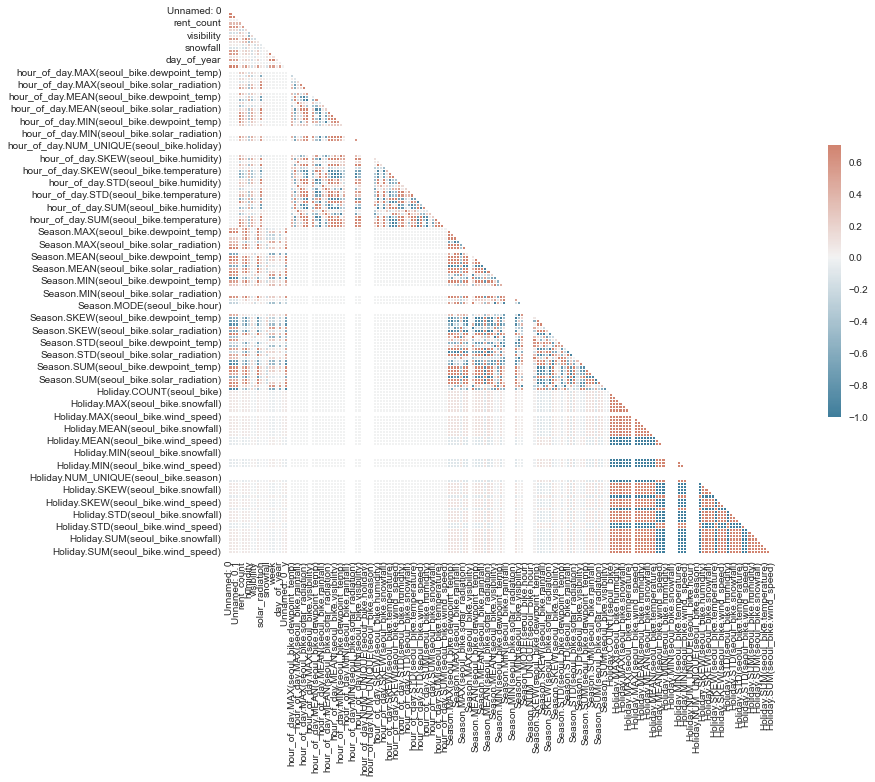

In [57]:
plt.subplots(figsize=(20, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap=cmap,vmax =0.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})